# Create grid_U file

In [1]:
from matplotlib import pylab
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from salishsea_tools import tidetools
from salishsea_tools import (nc_tools,viz_tools)
import matplotlib.cm as cm
from matplotlib import animation
from numpy import *
from pylab import *
%matplotlib inline

In [2]:
## for grid_U
plume_33u = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_U_0033.nc')
plume_34u = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_U_0034.nc')
plume_35u = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_U_0035.nc')
plume_39u = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_U_0039.nc')
plume_40u = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_U_0040.nc')
plume_41u = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_U_0041.nc')
plume_45u = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_U_0045.nc')
plume_46u = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_U_0046.nc')
plume_47u = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_U_0047.nc')
plume_51u = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_U_0051.nc')
plume_52u = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_U_0052.nc')
plume_53u = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_U_0053.nc')

In [3]:
nc_tools.show_variables(plume_33u)

[u'nav_lon', u'nav_lat', u'depthu', u'time_counter', u'time_counter_bnds', u'vozocrtx', u'u_wind_stress']


In [4]:
depthsu = plume_33u.variables['depthu']
timeu = plume_33u.variables['time_counter']

In [5]:
## for longitude 
lon33u= plume_33u.variables['nav_lon']
lon34u= plume_34u.variables['nav_lon']
lon35u= plume_35u.variables['nav_lon']
lon39u= plume_39u.variables['nav_lon']
lon40u= plume_40u.variables['nav_lon']
lon41u= plume_41u.variables['nav_lon']
lon45u= plume_45u.variables['nav_lon']
lon46u= plume_46u.variables['nav_lon']
lon47u= plume_47u.variables['nav_lon']
lon51u= plume_51u.variables['nav_lon']
lon52u= plume_52u.variables['nav_lon']
lon53u= plume_53u.variables['nav_lon']

In [6]:
## for latitude
lat33u= plume_33u.variables['nav_lat']
lat34u= plume_34u.variables['nav_lat']
lat35u= plume_35u.variables['nav_lat']
lat39u= plume_39u.variables['nav_lat']
lat40u= plume_40u.variables['nav_lat']
lat41u= plume_41u.variables['nav_lat']
lat45u= plume_45u.variables['nav_lat']
lat46u= plume_46u.variables['nav_lat']
lat47u= plume_47u.variables['nav_lat']
lat51u= plume_51u.variables['nav_lat']
lat52u= plume_52u.variables['nav_lat']
lat53u= plume_53u.variables['nav_lat']

In [7]:
## for u velocity
u33 = plume_33u.variables['vozocrtx']
u34 = plume_34u.variables['vozocrtx']
u35 = plume_35u.variables['vozocrtx']
u39 = plume_39u.variables['vozocrtx']
u40 = plume_40u.variables['vozocrtx']
u41 = plume_41u.variables['vozocrtx']
u45 = plume_45u.variables['vozocrtx']
u46 = plume_46u.variables['vozocrtx']
u47 = plume_47u.variables['vozocrtx']
u51 = plume_51u.variables['vozocrtx']
u52 = plume_52u.variables['vozocrtx']
u53 = plume_53u.variables['vozocrtx']

In [8]:
## try to combine longitude and latitude in grid_U
lonu = np.zeros([170, 138])
latu = np.zeros([170, 138])
## This is the edge for lon:
lonu[0:36, 0:6] = lon33u[:,:]
lonu[36:100, 0:6] = lon39u[:,:]
lonu[100:164, 0:6] = lon45u[:,:]
lonu[164:170, 0:6] = lon51u[:,:]
## This is the edge for lat:
latu[0:36, 0:6] = lat33u[:,:]
latu[36:100, 0:6] = lat39u[:,:]
latu[100:164, 0:6] = lat45u[:,:]
latu[164:170, 0:6] = lat51u[:,:]

In [9]:
## try to combine U velocity in grid_U
u = np.zeros([336, 40, 170, 138])
## This is the edge for u:
u[:,:, 0:36, 0:6] =u33[:,:,:,:]
u[:,:, 36:100, 0:6] = u39[:,:,:,:]
u[:,:, 100:164, 0:6 ] =u45[:,:,:,:]
u[:,:, 164:170, 0:6] = u51[:,:,:,:]

In [10]:
## u & lon & lat combination
for j in np.arange(36):
    for i in np.arange(66):
        u[:,:,j, 6+i] = u34[:,:,j,i]
        lonu[j, 6+i] = lon34u[j,i]
        latu[j, 6+i] = lat34u[j,i]
    print (j)
        
for j in np.arange(36):
    for i in np.arange(66):
        u[:,:,j,72+i] = u35[:,:,j,i]
        lonu[j, 72+i] = lon35u[j,i]
        latu[j, 72+i] = lat35u[j,i]
    print (j)
    
for j in np.arange(64):
    for i in np.arange(66):
        u[:,:, 36+j, 6+i] = u40[:,:,j,i]
        lonu[36+j, 6+i] = lon40u[j,i]
        latu[36+j, 6+i] = lat40u[j,i]
    print (j) 
    
for j in np.arange(64):
    for i in np.arange(66):
        u[:,:, 36+j, 72+i] = u41[:,:,j,i]
        lonu[36+j, 72+i] = lon41u[j,i]
        latu[36+j, 72+i] = lat41u[j,i]
    print (j) 
    
for j in np.arange(64):
    for i in np.arange(66):
        u[:,:,100 +j, 6+i] = u46[:,:,j,i]
        lonu[100+j, 6+i] = lon46u[j,i]
        latu[100+j, 6+i] = lat46u[j,i]
    print (j) 
    
for j in np.arange(64):
    for i in np.arange(66):
        u[:,:,100 +j, 72+i] = u47[:,:,j,i]
        lonu[100+j, 72+i] = lon47u[j,i]
        latu[100+j, 72+i] = lat47u[j,i]
    print (j)
    
for j in np.arange(6):
    for i in np.arange(66):
        u[:,:,164 +j, 6+i] = u52[:,:,j,i]
        lonu[164+j, 6+i] = lon52u[j,i]
        latu[164+j, 6+i] = lat52u[j,i]
    print (j) 
    
for j in np.arange(6):
    for i in np.arange(66):
        u[:,:,164 +j, 72+i] = u53[:,:,j,i]
        lonu[164+j, 72+i] = lon53u[j,i]
        latu[164+j, 72+i] = lat53u[j,i]
    print (j)    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
0
1
2
3
4
5
0
1
2
3
4
5


<matplotlib.colorbar.Colorbar instance at 0x7f624a3185f0>

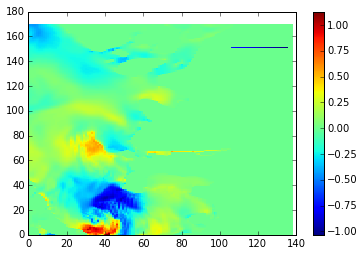

In [12]:
## u plot
plt.pcolormesh(u[0,0, :,:])
plt.colorbar()

In [14]:
## other parameters
depths = plume_33u.variables['depthu']
time = plume_33u.variables['time_counter']
time_counterbnds = plume_33u.variables['time_counter_bnds']

In [20]:
# build grid_U nc file
grid_U = nc.Dataset('1hplume06160629gridU.nc', 'w')
#nc_tools.init_dataset_attrs(
    #grid_U, 
    #title='Salinity Temperature Initial Conditions based on Nowcast June 14, 2015 for extended Fraser river channel', 
    #notebook_name='Explore1h_plumeFileStructure', 
    #nc_filepath='/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_plume_06160629_grid_T.nc')
    #comment='Combined grid_T file with extended Fraser bathymetry from June 16, to 29')
grid_U.createDimension('y', 170)
grid_U.createDimension('x', 138)
grid_U.createDimension('depthu',size = len(depths))
grid_U.createDimension('time_counter', size = len(time))
grid_U.createDimension('tbnds', size = 2)
nc_tools.show_dimensions(grid_U)
# show variables
nav_lat = grid_U.createVariable('nav_lat', 'float32', ('y','x'))
nav_lat.long_name = 'Latitude'
nav_lat.units = 'degrees_north'
nav_lat[:] = latu
nav_lon = grid_U.createVariable('nav_lon', 'float32', ('y','x'))
nav_lon.long_name = 'Longitude'
nav_lon.units = 'degrees_east'
nav_lon[:] = lonu
depthu = grid_U.createVariable('depthu', 'float32', ('depthu'), zlib=True)
#depths = foo.createVariable('Bathymetry', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)

depthu.long_name = 'Depth'
depthu.coordinates = 'depthU'
depthu.units = 'm'
depthu.positive = 'down'
depthu.valid_range = np.array((4., 428.))##minimum depth 4m
depthu[:] = depths

time_counter = grid_U.createVariable('time_counter', 'float64', ('time_counter'))
time_counter.units = 'seconds since 2015-06-15 0:00:00'
time_counter.long_name = 'Time axis'
time_counter.time_origin = ' 2015-JUN-15 00:00:00'
#time.coordinates = 'time_counter'
time_counter[:] = time

time_counter_bnds = grid_U.createVariable('time_counter_bnds', 'float64', 
                                          ('time_counter', 'tbnds'))
#time_counter.units = 'seconds since 2015-06-16 0:00:00'
#time_counter.long_name = 'Time axis'
#time.coordinates = 'time_counter'
time_counter_bnds[:] = time_counterbnds

vozocrtx = grid_U.createVariable('vozocrtx', 'float32', 
                               ('time_counter','depthu','y','x'))
vozocrtx.units = 'm/s'
vozocrtx.long_name = 'ocean current along i-axis'  
vozocrtx.coordinates = 'nav_lon nav_lat depthu time_counter'
vozocrtx.grid = 'SalishSea6, extended and deepen Fraser'
vozocrtx[:] = u

grid_U.history = """[2015-06-16] Created"""

<type 'netCDF4.Dimension'>: name = 'y', size = 170

<type 'netCDF4.Dimension'>: name = 'x', size = 138

<type 'netCDF4.Dimension'>: name = 'depthu', size = 40

<type 'netCDF4.Dimension'>: name = 'time_counter', size = 336

<type 'netCDF4.Dimension'>: name = 'tbnds', size = 2



In [21]:
grid_U.close()

In [22]:
a= nc.Dataset('1hplume06160629gridU.nc')
nc_tools.show_variables(a)

[u'nav_lat', u'nav_lon', u'depthu', u'time_counter', u'time_counter_bnds', u'vozocrtx']


In [24]:
llat = a.variables['nav_lat']
llat[30,23]

48.895023

In [25]:
ddept = a.variables['depthu']
ddept[4]

4.5000706

In [26]:
tc = a.variables['time_counter']
tc[3]

99000.0

In [27]:
uuu = a.variables['vozocrtx']
uuu[3,4,5,6]

0.12026661